<h1 style="color: balck; font-family: 'Comic Sans MS'">Bio Signal Analysis🚭</h1>

<h1 style="font-family:Palatino;color:darkred;"> Project Objective: </h1>
To build a machine learning model that can classify the presence or absence of smoking in a person given their bio-signals.
<h1 style="font-family:Palatino;color:darkred;"> Problem Statement: </h1>
Smoking is a leading cause of preventable death and disease worldwide. Early detection of smoking can help prevent serious health problems. However, traditional methods of smoking detection, such as self-reporting or surveys, are not always accurate. Bio-signals, such as heart rate, respiratory rate, and blood pressure, can be used to more accurately detect smoking. However, it is difficult for humans to manually analyze bio-signals to identify smokers.
<h1 style="font-family:Palatino;color:darkred;"> Proposed Solution: </h1>

I propose to build a machine learning model that can classify the presence or absence of smoking in a person given their bio-signals. The model will be trained on a dataset of bio-signals from both smokers and non-smokers. Once trained, the model will be able to predict whether a new person is a smoker or not based on their bio-signals.

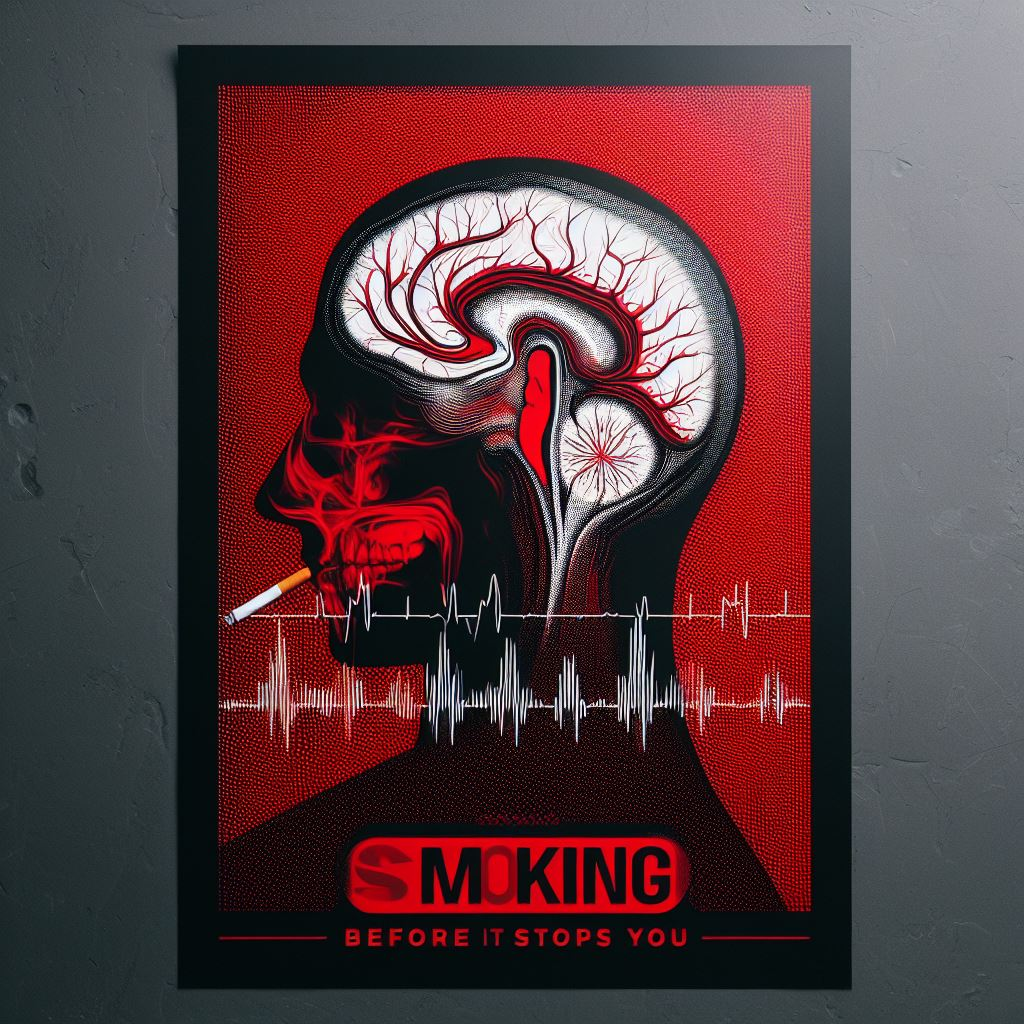

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [54]:
data = pd.read_csv(r"E:\Projects\Bio-Signal-Analysis\smoking.csv")

In [55]:
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [5]:
data.shape

(55692, 27)

In [6]:
data.isnull().sum().sum()

0

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


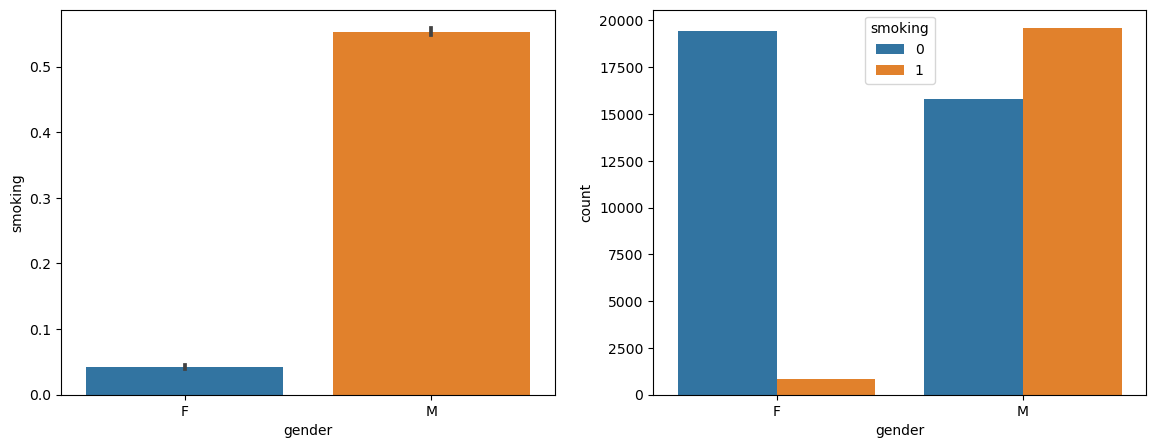

In [9]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
sns.barplot(x='gender',y='smoking',data=data)
plt.subplot(1,2,2)
sns.countplot(x='gender',hue='smoking',data=data)
plt.show()

In [57]:
print(data.smoking.value_counts())
px.sunburst(data,path=['gender','smoking'])

0    35237
1    20455
Name: smoking, dtype: int64


In [11]:
smokers = data[data['smoking']==1]

In [12]:
px.histogram(smokers.age)

In [13]:
fig = px.density_contour(smokers, y='age')
fig.update_layout(
    xaxis_title='Density',
    yaxis_title='Age'
)

In [58]:
data.oral.unique()

array(['Y'], dtype=object)

In [59]:
data.drop('oral',axis=1,inplace=True)

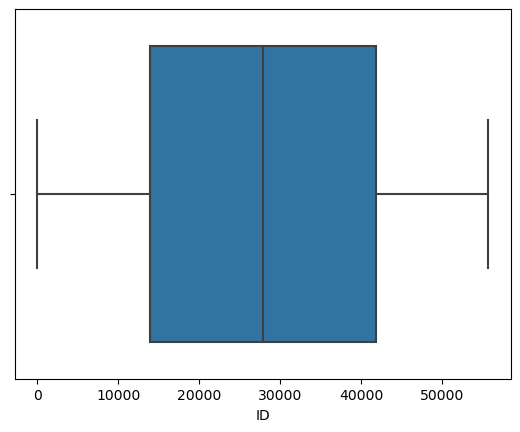

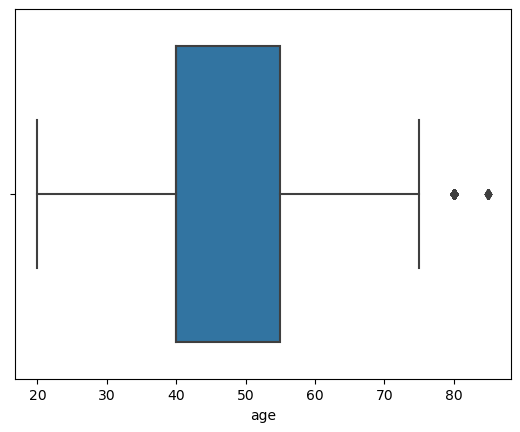

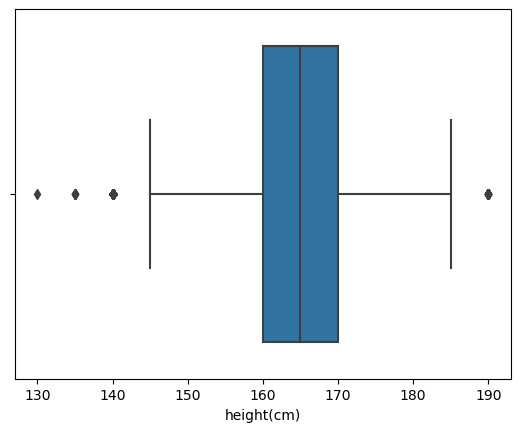

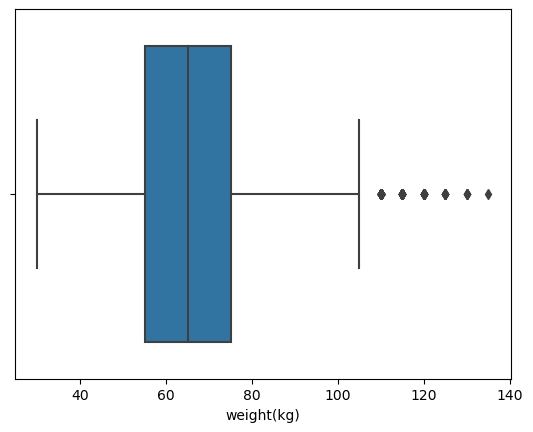

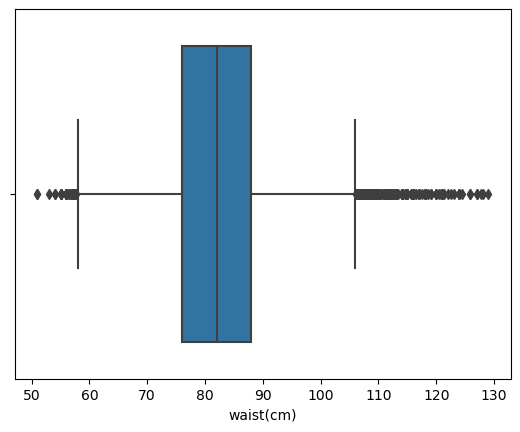

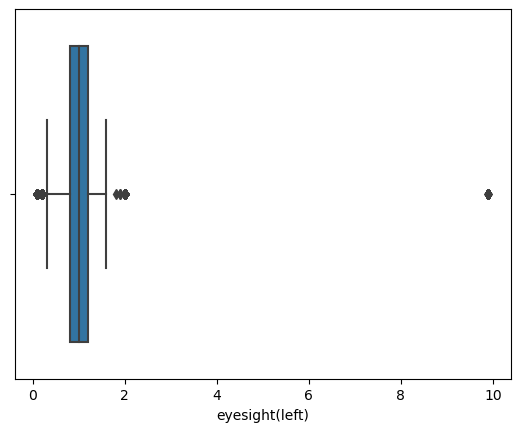

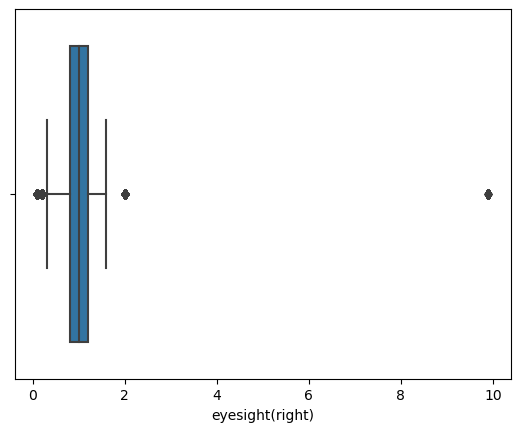

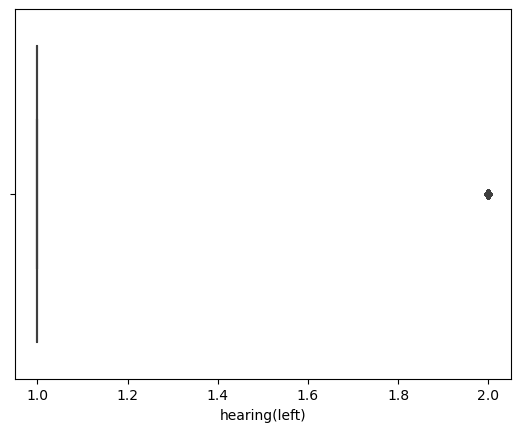

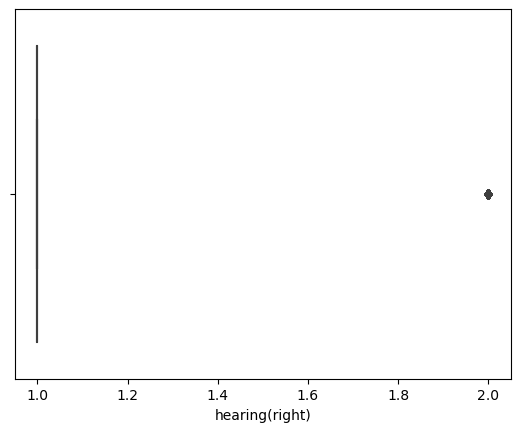

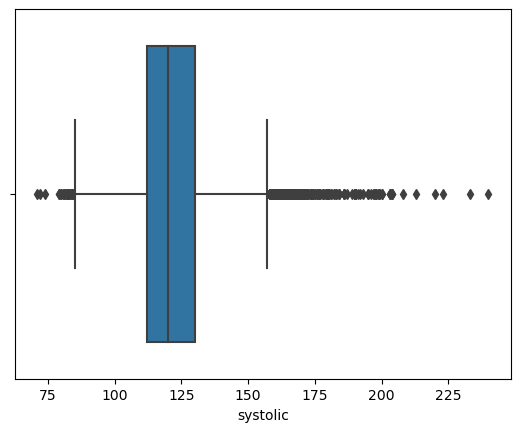

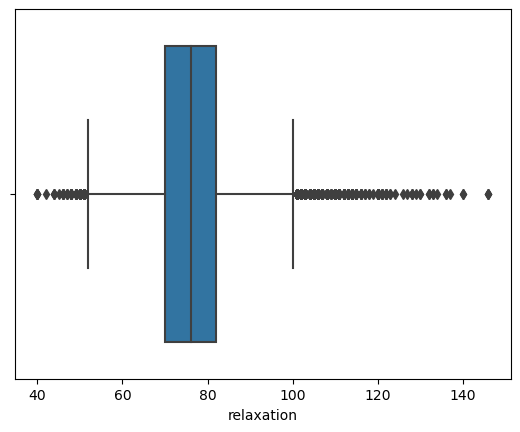

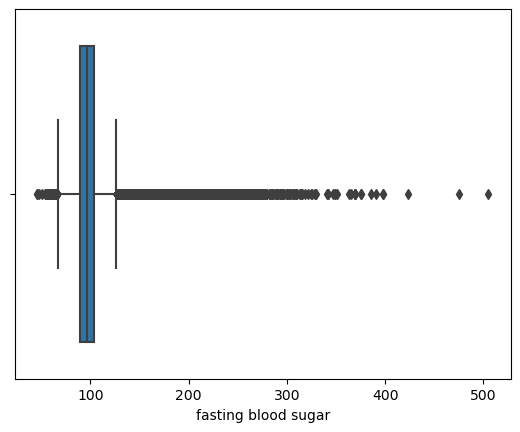

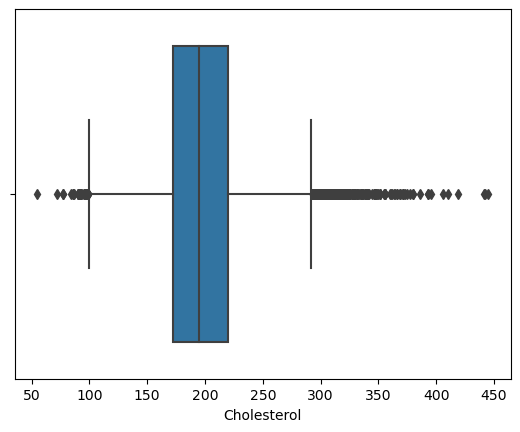

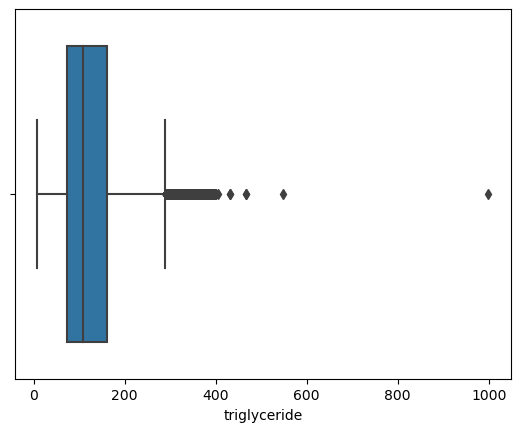

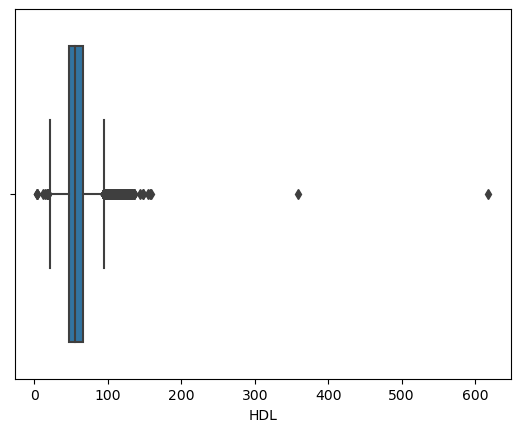

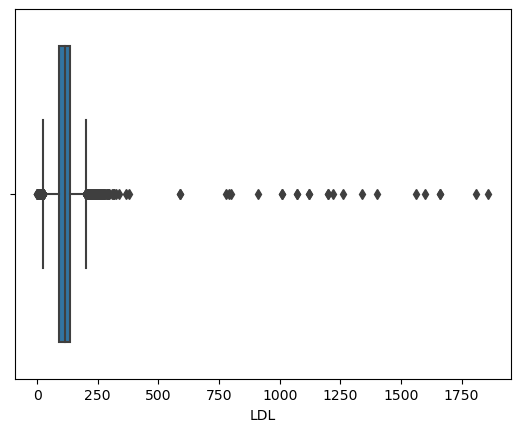

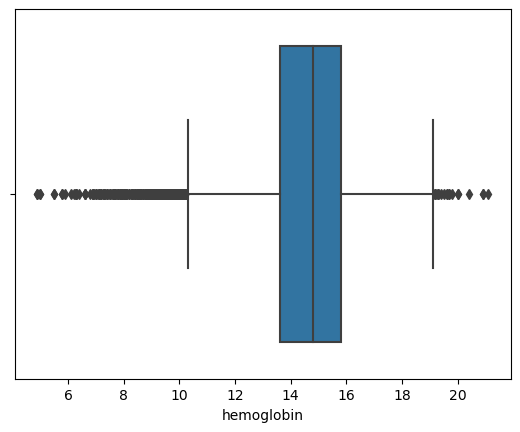

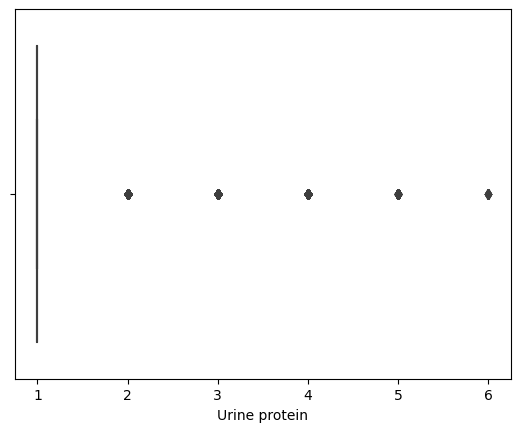

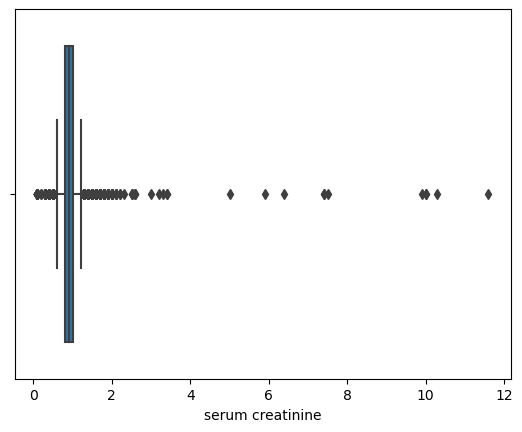

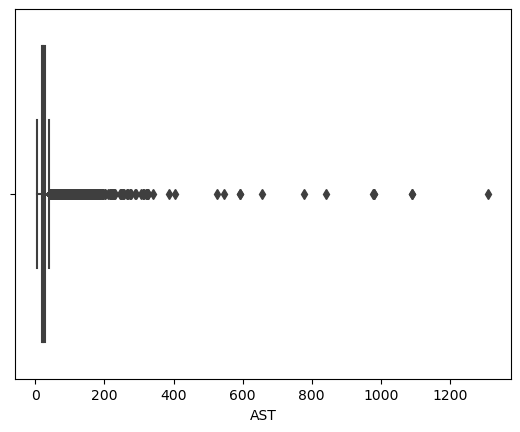

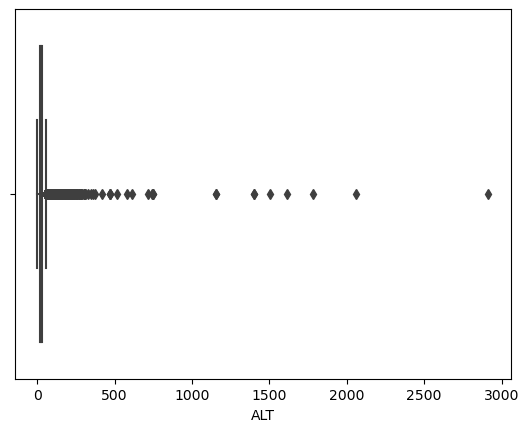

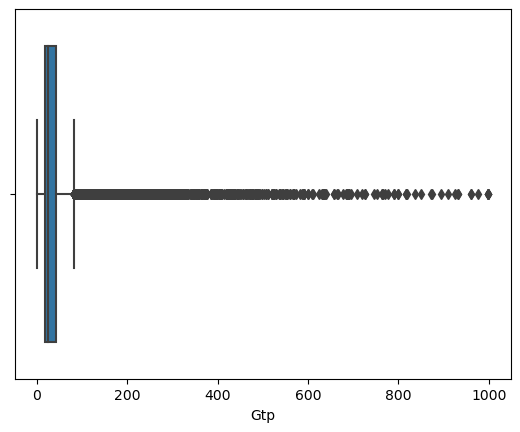

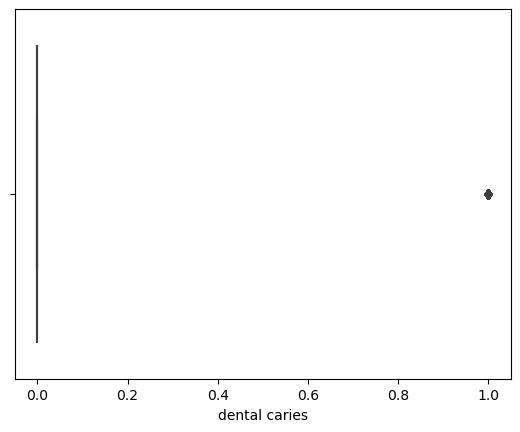

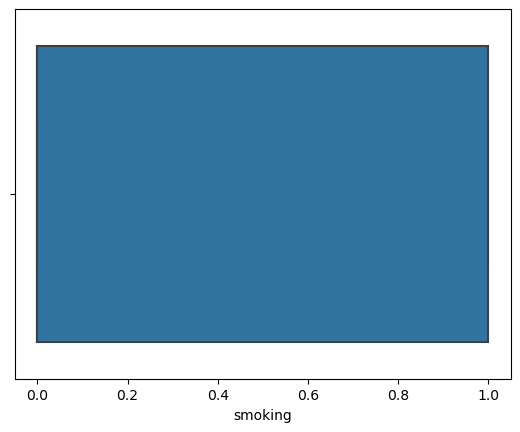

In [16]:
for i in data.columns:
    if(data[i].dtypes=='int64' or data[i].dtypes=='float64'):
        sns.boxplot(data[i])
        plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["gender"]=le.fit_transform(data["gender"])
data["tartar"]=le.fit_transform(data["tartar"])
data["dental caries"]=le.fit_transform(data["dental caries"])

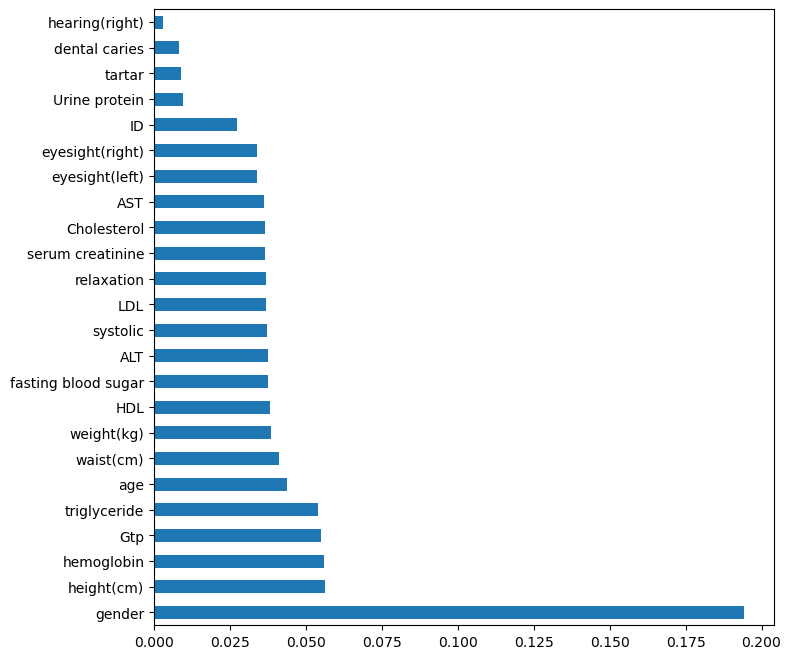

In [19]:
x=data.iloc[:,:-1]
y=data["smoking"]
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
data1=pd.Series (model.feature_importances_, index= x.columns)
plt.figure(figsize=(8,8))
data1.nlargest (24).plot(kind='barh')
plt.show()

In [23]:
data.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')

In [32]:
data1.sort_values(ascending=False).head(15).index

Index(['gender', 'height(cm)', 'hemoglobin', 'Gtp', 'triglyceride', 'age',
       'waist(cm)', 'weight(kg)', 'HDL', 'fasting blood sugar', 'ALT',
       'systolic', 'LDL', 'relaxation', 'serum creatinine'],
      dtype='object')

In [34]:
X= data[['gender', 'height(cm)', 'hemoglobin', 'Gtp', 'triglyceride', 'age',
       'waist(cm)', 'weight(kg)', 'HDL', 'fasting blood sugar', 'ALT',
       'systolic', 'LDL', 'relaxation', 'serum creatinine']]
y=data["smoking"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [42]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test,y_pred)
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      7027
           1       0.64      0.69      0.66      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.73     11139
weighted avg       0.75      0.74      0.74     11139



In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7027
           1       0.69      0.69      0.69      4112

    accuracy                           0.77     11139
   macro avg       0.75      0.75      0.75     11139
weighted avg       0.77      0.77      0.77     11139



In [50]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train).score (x_test,y_test)
y_pred=RF.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7027
           1       0.75      0.79      0.77      4112

    accuracy                           0.83     11139
   macro avg       0.81      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139

